<a href="https://colab.research.google.com/github/electropavuk/crypto_trader/blob/master/ipynb/support_and_resistance_levels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import random

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

google_drive_dir = '/content/drive/MyDrive/Colab Notebooks/crypto_trader/'
data_dir = google_drive_dir + 'data/'

In [6]:
def load_history(filename):
    return pd.read_csv(data_dir + filename)

def prepare_data(df, period=20, mult=2):
    df = df[['Close']]
    return df

history = load_history('1h.csv')

In [7]:
def config_plot(ax):
    ax.margins(0, .1)
    ax.grid(True)

def show_graph(data, ax, **kwargs):
    n = len(data)
    config_plot(ax)
    ax.plot(range(-n, 0), data['Close'].iloc[-n:], label='Closing price', **kwargs)

lvl 29329.7, strength 2
lvl 36140.8, strength 2
lvl 31264.0, strength 8
lvl 34581.0, strength 10
lvl 32876.2, strength 11


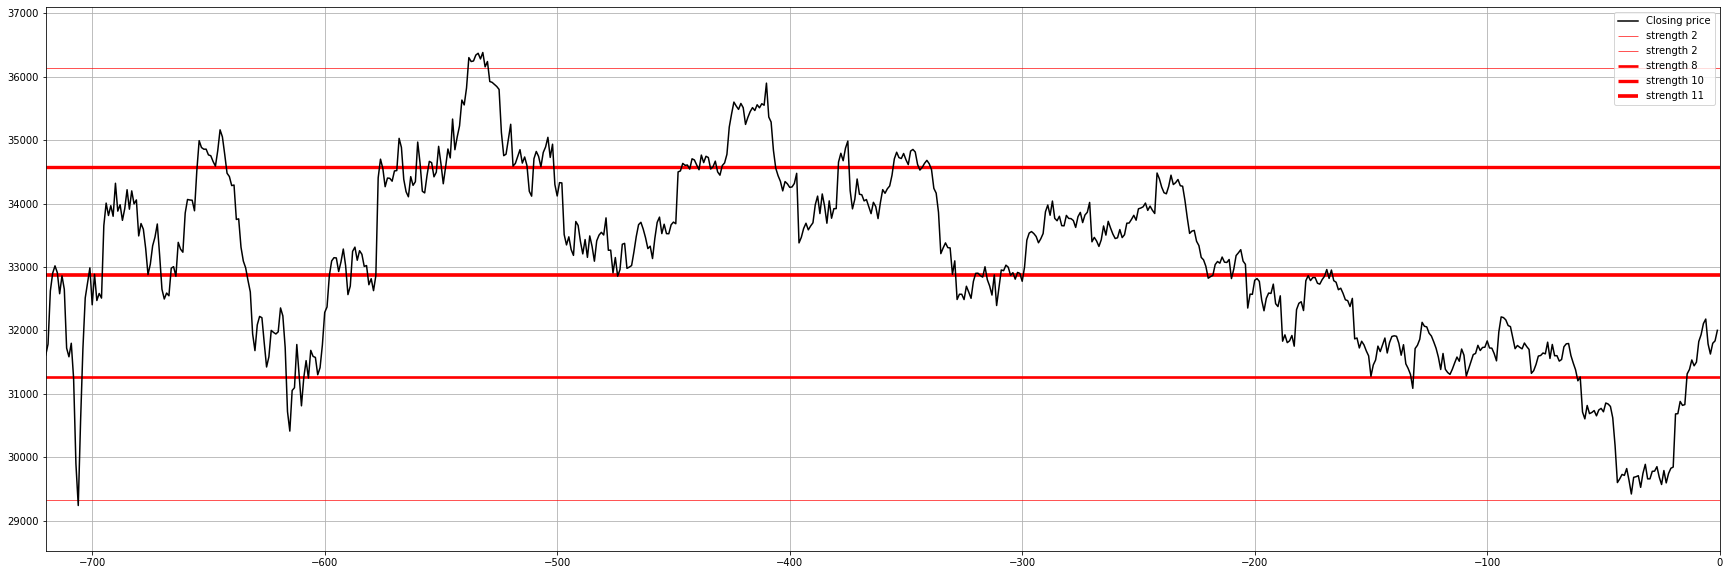

In [8]:
def get_levels(data, nlevels=10, scope=10):
    peaks = get_peaks(data, scope) + [999999999]
    peaks.sort()
    group = []
    levels = []
    for peak in peaks:
        if np.std(group + [peak]) > 500:
            lvl, strength = np.mean(group), len(group)
            levels.append((lvl, strength))
            group = [peak]
        else:
            group.append(peak)
    return list(sorted(levels, key=lambda x: x[1]))[-nlevels:]


def get_peaks(data, scope):
    mins = data['Close'].rolling(scope).min().values[::scope]
    maxs = data['Close'].rolling(scope).max().values[::scope]
    peaks = []
    for i in range(1, len(mins) - 1):
        if maxs[i - 1] < maxs[i] > maxs[i + 1]:
            peaks.append(maxs[i])
        if mins[i - 1] > mins[i] < mins[i + 1]:
            peaks.append(mins[i])
    return peaks


n = 24 * 30
data = prepare_data(history)[-n:]

plt.figure(figsize = (30, 10))
ax = plt.gca()

nlevels = 5
scope = 10
width_factor = 3

for lvl, strength in get_levels(data, nlevels=nlevels, scope=scope):
    print('lvl {:.1f}, strength {}'.format(lvl, strength))
    ax.hlines(lvl, -n, 0, color='red', linestyle='-', linewidth=strength/width_factor, label=f'strength {strength}')

show_graph(data, ax, color='black')
plt.legend()